## Objective : Google Stock Price Prediction ( Upward and Downward Trend ) using RNN


### S-1: Data Preprocessing :

In [1]:
  ## Importing necessary lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.style.use('dark_background')

from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
## Importing Training Dataset
data_train = pd.read_csv("D:\Datasets\Google_Stock_Price_Train_A-Z_RNN.csv")

In [3]:
data_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [5]:
data_train.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [6]:
## As we need First column
training_set = data_train.iloc[:, 1:2].values    ## 1:2 means only one column

In [7]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [8]:
## Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [9]:
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [10]:
## Creating a datastructure with 60 time steps (as per our convenient) and 1 output
x_train = []    ## 60 previous stock prices & This is list
y_train = []    ## Next stock price & this one is also list
for i in range(60,1258):
    x_train.append(training_set_scaled[i-60:i, 0])    
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [12]:
x_train.shape     ## 1258 - 60 = 1198

(1198, 60)

In [13]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [14]:
y_train.shape

(1198,)

### Obs : Steps we have followed
- 1. Creating a blank list for x_train and y_train data
- 2. Divided the whole dataset into different parts based on 60 intervals
- 3. Taken 1st 60 days data as feature i.e t-1 and immediate next day data i.e t as target value
- 4. Lastly converted as list into array

In [15]:
## Reshaping to create new dimensionality i.e 3D to form our RNN
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))  ## 1 is for one predictor

### S-2 : Building RNN (LSTM)

In [16]:
## Creating Model
model_1 = Sequential()    # Initialise
# Adding 1st LSTM layers
model_1.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1))) 
## Units i.e number of shells or memory unit in the LSTM layers which 50 neurons
model_1.add(Dropout(0.2))   # Dropout Regularisation to avoid overfitting
# Adding 2nd LSTM layers and Drooput
model_1.add(LSTM(units = 50, return_sequences = True))
model_1.add(Dropout(0.2))
# Adding 3rd LSTM layers and Drooput
model_1.add(LSTM(units = 50, return_sequences = True))
model_1.add(Dropout(0.2))
# Adding 4th LSTM layers and Drooput
model_1.add(LSTM(units = 50))
model_1.add(Dropout(0.2))
# Adding output layers
model_1.add(Dense(units = 1))

## Compile the model
model_1.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

## Fit the model
model_1.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 9s 64ms/step - loss: 0.0407 - accuracy: 0.0017
Epoch 2/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0063 - accuracy: 0.0017
Epoch 3/100
38/38 [==============================] - 2s 64ms/step - loss: 0.0058 - accuracy: 0.0017
Epoch 4/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0054 - accuracy: 0.0017
Epoch 5/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0050 - accuracy: 0.0017
Epoch 6/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0049 - accuracy: 0.0017
Epoch 7/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0045 - accuracy: 0.0017
Epoch 8/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0043 - accuracy: 0.0017
Epoch 9/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0047 - accuracy: 0.0017
Epoch 10/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0042 - accuracy: 0.0017

38/38 [==============================] - 3s 68ms/step - loss: 0.0016 - accuracy: 0.0017
Epoch 83/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0015 - accuracy: 0.0017
Epoch 84/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0015 - accuracy: 0.0017
Epoch 85/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0015 - accuracy: 0.0017
Epoch 86/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0016 - accuracy: 0.0017
Epoch 87/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0014 - accuracy: 0.0017
Epoch 88/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0014 - accuracy: 0.0017
Epoch 89/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0015 - accuracy: 0.0017
Epoch 90/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0016 - accuracy: 0.0017
Epoch 91/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0014 - accuracy: 0.0017
Epo

### S-3 - Making the predictions and visualising the results

In [17]:
### Getting the real stock price of 2017
data_test = pd.read_csv("D:\Datasets\Google_Stock_Price_Test_A-Z_RNN.csv")
real_stock_price = data_test.iloc[:, 1:2].values

In [18]:
len(data_train)

1258

In [19]:
len(data_test)

20

In [20]:
data_total = pd.concat((data_train['Open'], data_test['Open']), axis = 0)  ## to get 60 prev input days
inputs = data_total[len(data_total) - len(data_test) - 60:].values   ## as not to change the test data

In [21]:
len(data_total)

1278

In [22]:
len(data_total) - len(data_test)

1258

In [23]:
len(inputs)

80

In [24]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)  

In [25]:
## Datastructure and Reshaping
x_test = []
for i in range(60, 80):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [26]:
predicted_stock_price = model_1.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)  
## Essential to inverse transform the scaling as original is not scaled

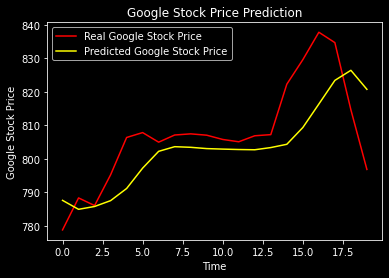

In [27]:
### Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'yellow', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

### Obs : Few part is very smooth and predict well but few part doesn't 

## Final comments :
-  The RNN we built was a regressor. Indeed, we were dealing with Regression because we were trying to predict a continuous outcome (the Google Stock Price). For Regression, the way to evaluate the model performance is with a metric called RMSE (Root Mean Squared Error). It is calculated as the root of the mean of the squared differences between the predictions and the real values.

- However for our specific Stock Price Prediction problem, evaluating the model with the RMSE does not make much sense, since we are more interested in the directions taken by our predictions, rather than the closeness of their values to the real stock price. We want to check if our predictions follow the same directions as the real stock price and we don’t really care whether our predictions are close the real stock price. The predictions could indeed be close but often taking the opposite direction from the real stock price.


## Improving the RNN
- Here are different ways to improve the RNN model:

1. Getting more training data: we trained our model on the past 5 years of the Google Stock Price but it would be even better to train it on the past 10 years.

2. Increasing the number of timesteps: the model remembered the stock prices from the 60 previous financial days to predict the stock price of the next day. That’s because we chose a number of 60 timesteps (3 months). You could try to increase the number of timesteps, by choosing for example 120 timesteps (6 months).

3. Adding some other indicators: if you have the financial instinct that the stock price of some other companies might be correlated to the one of Google, you could add this other stock price as a new indicator in the training data.

4. Adding more LSTM layers: we built a RNN with four LSTM layers but you could try with even more.

5. Adding more neurones in the LSTM layers: we highlighted the fact that we needed a high number of neurones in the LSTM layers to respond better to the complexity of the problem and we chose to include 50 neurones in each of our 4 LSTM layers. You could try an architecture with even more neurones in each of the 4 (or more) LSTM layers.

## END